In [1]:
!pip install import-ipynb
import import_ipynb

In [2]:
# import import_mpii
# activities_set = import_mpii.activities_set
#
# train_loader =  import_mpii.train_loader
# val_loader = import_mpii.val_loader
# test_loader = import_mpii.test_loader
# label_encoder = import_mpii.label_encoder
# num_classes = import_mpii.num_classes

I: 0. Filename ./content/pushups/images?q=tbn:ANd9GcTipRg3kgcAKY1Tkkv3-DdWU3ieLf1D2Ufbgg&s act Name: ['down']
I: 1. Filename ./content/pushups/images?q=tbn:ANd9GcSrq5Rpn32O1LrxtdJ0XHVEeAycjYnD5I1U1Q&s act Name: ['down']
I: 2. Filename ./content/pushups/images?q=tbn:ANd9GcQ1zk-gZtJr_7EKR-lj7Sxbrss-IsFUwFR45A&s act Name: ['down']
I: 3. Filename ./content/pushups/images?q=tbn:ANd9GcStvUucv9ug4dkD0212d969hHxxtN6dmv1ABw&s act Name: ['down']
I: 4. Filename ./content/pushups/images?q=tbn:ANd9GcSFcv_uArv-n5jKvs9B3GEmTSU0EuudGQKaPg&s act Name: ['down']
I: 5. Filename ./content/pushups/images?q=tbn:ANd9GcQSEDvfeLHdYfuizjS297D7Gn588-uhO4kdAA&s act Name: ['down']
I: 6. Filename ./content/pushups/DSC_0526.JPG act Name: ['down']
I: 7. Filename ./content/pushups/images?q=tbn:ANd9GcTLfIXJxE7iGQ_SJty50yNoHqQfdv1vETz-qA&s act Name: ['down']
I: 8. Filename ./content/pushups/images?q=tbn:ANd9GcRaofQsvW9_l2BcEp89U0Etet77Pa_8ja5RlQ&s act Name: ['down']
I: 9. Filename ./content/pushups/images?q=tbn:ANd9GcQIw

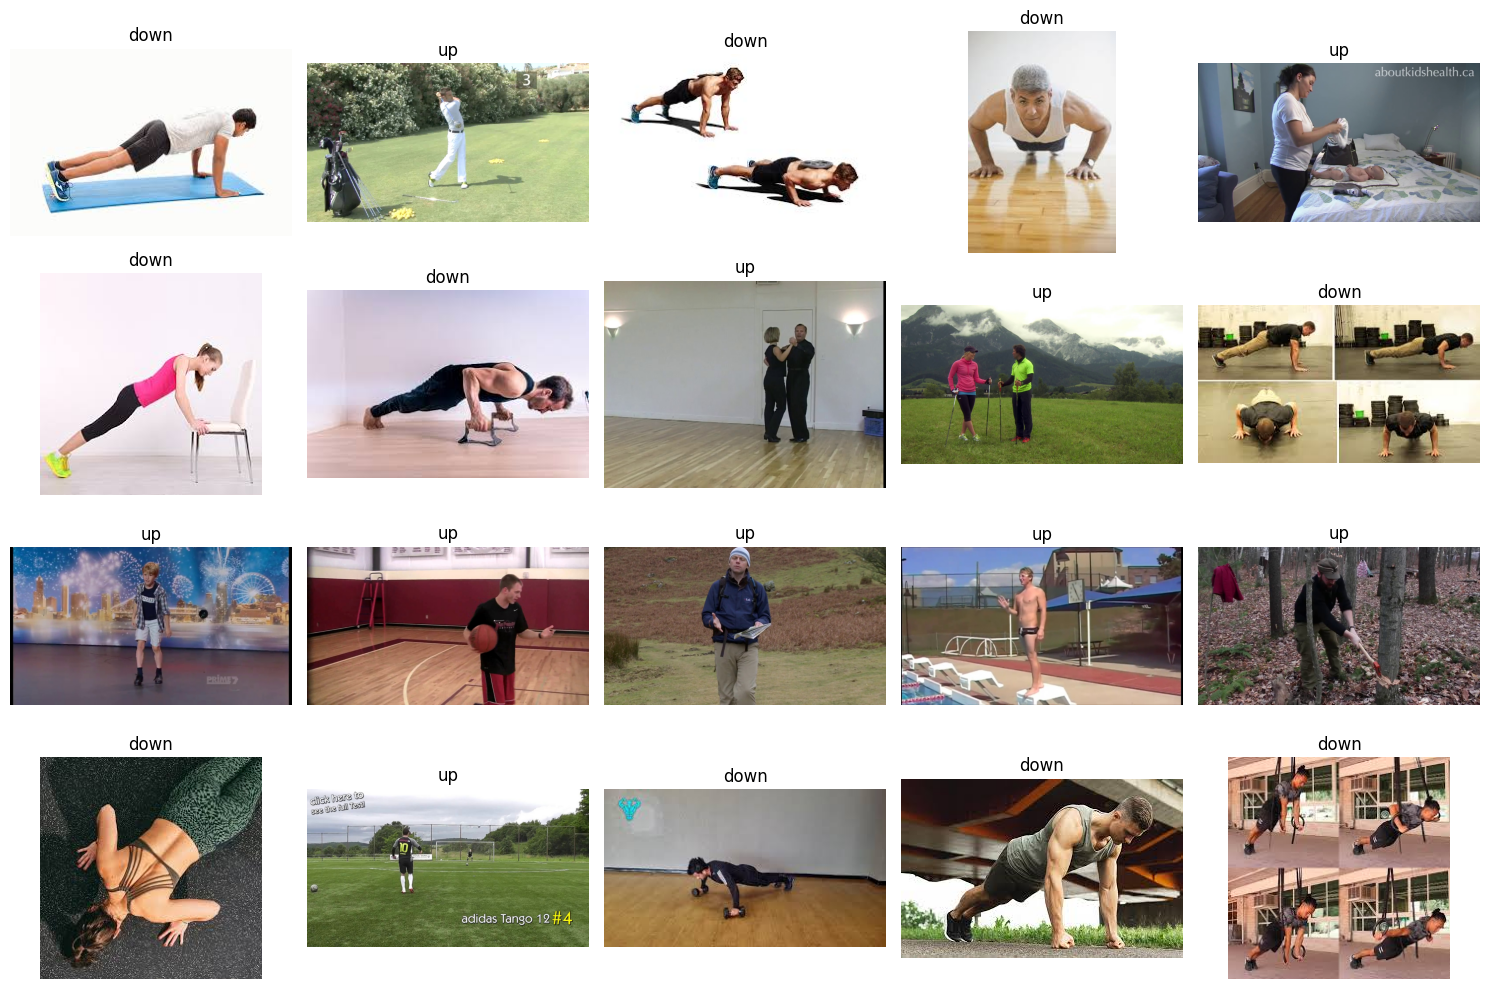

Category: down, Count: 388
Category: up, Count: 524


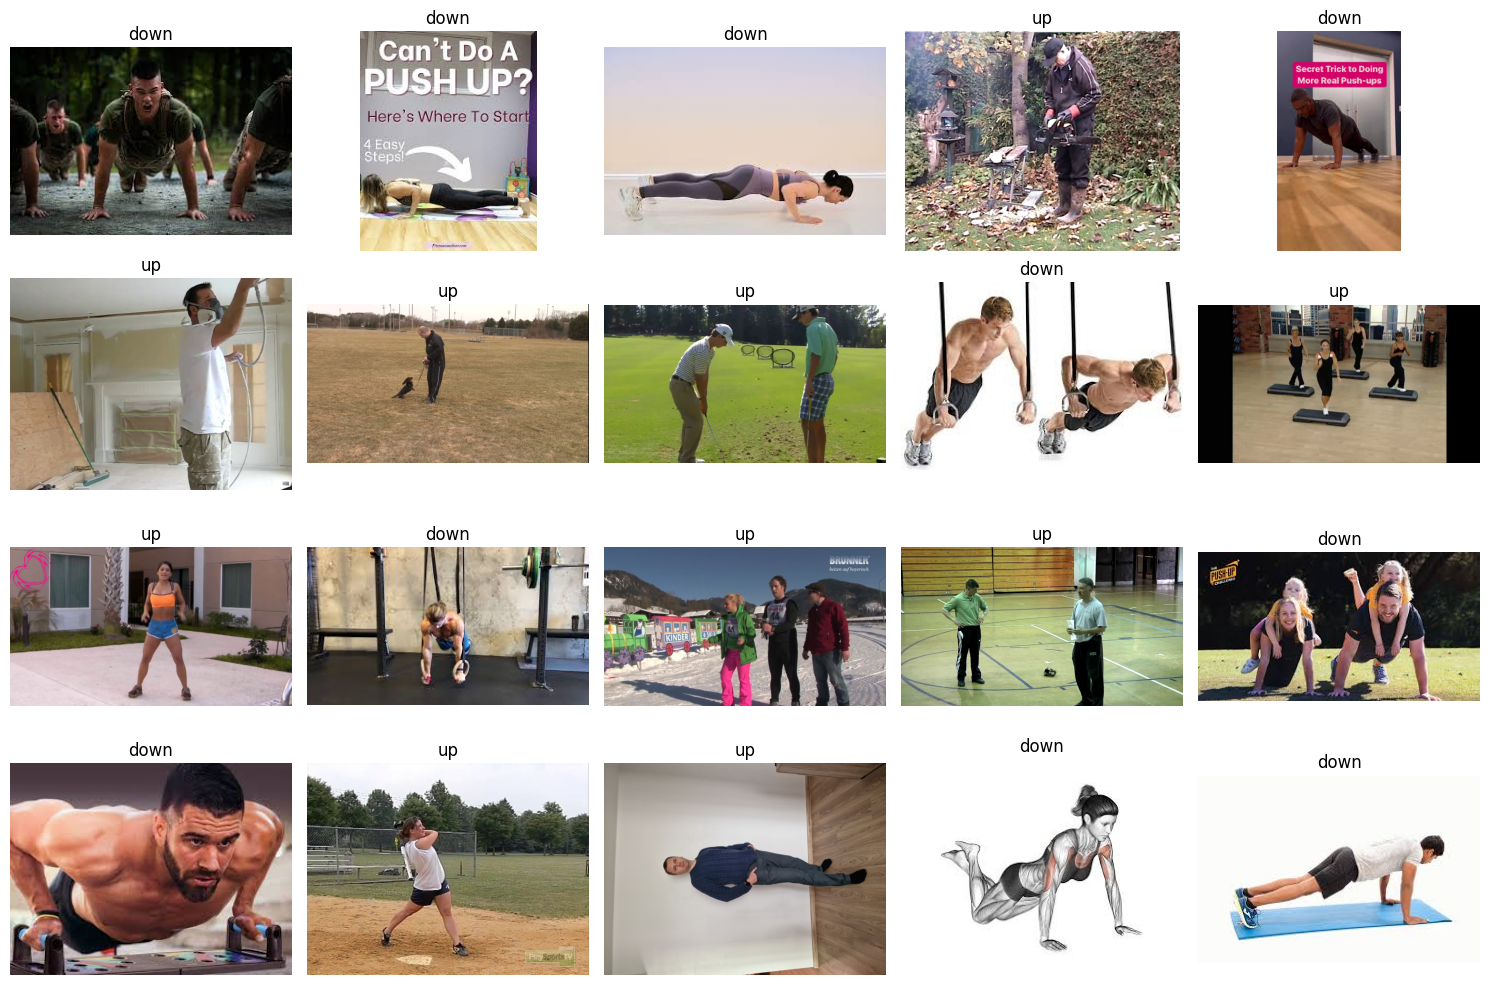

Filtered dataset size: 912
[('./content/standing/001694766.jpg', ['up']), ('./content/pushups/DSC_0529.JPG', ['down']), ('./content/pushups/images?q=tbn:ANd9GcQoJ7tKU7MvRWtyz-AUAeN3GB-QDusDH-dZHw&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcSUG95tBLl1dK2u9hgI9BTlMg1cxTELSbMFOQ&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcS-G9eB1pmbF-P4kd8mS5RQIi44-6_Foe5Rqw&s', ['down']), ('./content/standing/018280003.jpg', ['up']), ('./content/standing/020201567.jpg', ['up']), ('./content/standing/005702691.jpg', ['up']), ('./content/standing/007417620.jpg', ['up']), ('./content/standing/020883702.jpg', ['up']), ('./content/standing/000502550.jpg', ['up']), ('./content/standing/002162699.jpg', ['up']), ('./content/standing/005847926.jpg', ['up']), ('./content/standing/020426755.jpg', ['up']), ('./content/standing/007150302.jpg', ['up']), ('./content/standing/008778824.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcSS8PCNx9h9jQxKJe7lA-ID6IVgF5Qeq7weYQ&s', ['down']), ('./conten

In [3]:
import import_selected
activities_set = import_selected.activities_set

train_loader =  import_selected.train_loader
val_loader = import_selected.val_loader
test_loader = import_selected.test_loader
label_encoder = import_selected.label_encoder
num_classes = import_selected.num_classes

In [4]:
# import import_coco
#
# train_loader =  import_coco.train_loader
# val_loader = import_coco.val_loader
# test_loader = None

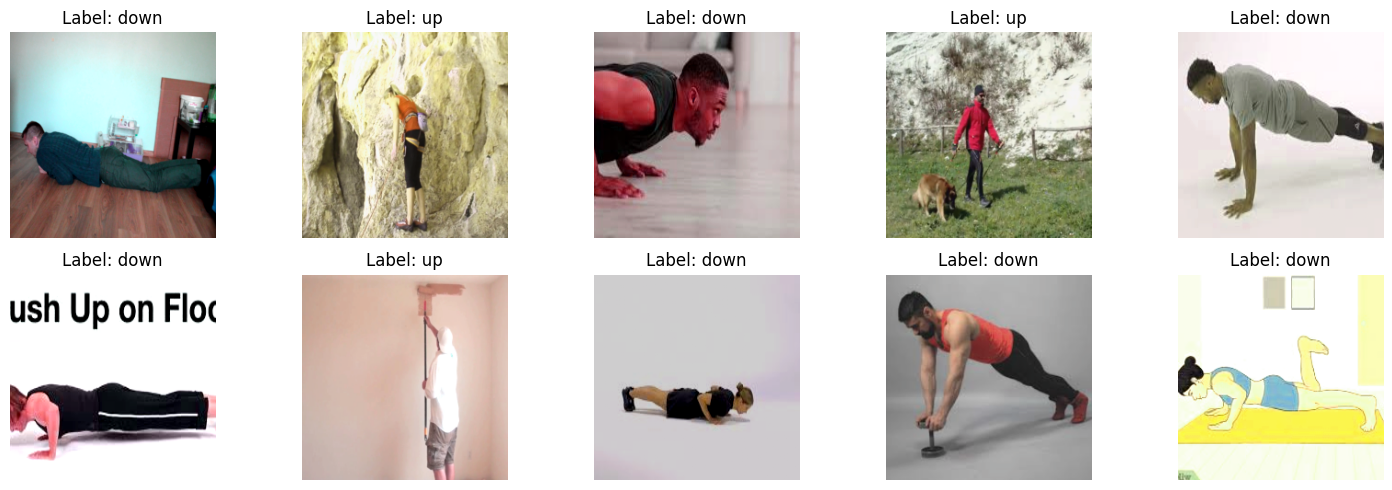

In [5]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Function to visualize 10 images with labels
def visualize_images_with_labels(train_loader, label_encoder):
    # Get a batch of data
    data_iter = iter(train_loader)
    images, labels = next(data_iter)

    # Reverse normalization for visualization
    inv_normalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    images = [inv_normalize(img).permute(1, 2, 0).numpy() for img in images[:10]]

    # Plot 10 images with labels
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {label_encoder.inverse_transform([labels[i].item()])[0]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
visualize_images_with_labels(train_loader, import_selected.label_encoder)

In [6]:
import torch
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

Using device: cuda


In [7]:
# BEST
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def train_model(train_loader, val_loader, test_loader, model_class, epochs=5):

    # Initialize the model, loss function, and optimizer
    model = model_class(2)
    model.to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    best_val_acc = 0

    # Training loop
    for epoch in range(epochs):
        model.train()
        print("training... 💪")
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            train_correct += (predicted == labels).sum().item()
            train_total += labels.size(0)

            if batch_idx % 10 == 0:
                print(f'Epoch [{epoch + 1}/{epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        train_accuracy = 100 * train_correct / train_total
        train_accuracies.append(train_accuracy)

        # Validation loop
        model.eval()
        print("evaluating... !!!")
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(DEVICE), target.to(DEVICE)
                outputs = model(data)
                loss = criterion(outputs, target)
                val_loss += loss.item()

                predicted = torch.argmax(outputs, dim=1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = 100 * correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_weights = model.state_dict()
            torch.save(best_weights, "best.pt")
            print(f"Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾")

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {running_loss / len(train_loader):.4f}, "
              f"Train Accuracy: {train_accuracy:.4f}%, Validation Loss: {val_loss:.4f}, "
              f"Validation Accuracy: {val_accuracy:.4f}%  Best so far: {best_val_acc:.4f}%")

    # Test evaluation
    print("\nEvaluating on test dataset...")
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            outputs = model(data)
            loss = criterion(outputs, target)
            test_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / total
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Plot the loss and accuracy curves
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()

    return best_val_acc

training... 💪
Epoch [1/100], Batch [1/23], Loss: 0.6824
Epoch [1/100], Batch [11/23], Loss: 0.5794
Epoch [1/100], Batch [21/23], Loss: 0.5888
evaluating... !!!
Saving best model...💾
Epoch 1/100, Train Loss: 0.8517, Train Accuracy: 63.24%, Validation Loss: 33.1315, Validation Accuracy: 59.34%
training... 💪
Epoch [2/100], Batch [1/23], Loss: 0.7128
Epoch [2/100], Batch [11/23], Loss: 0.5658
Epoch [2/100], Batch [21/23], Loss: 0.6388
evaluating... !!!
Saving best model...💾
Epoch 2/100, Train Loss: 0.6516, Train Accuracy: 62.69%, Validation Loss: 0.6983, Validation Accuracy: 63.74%
training... 💪
Epoch [3/100], Batch [1/23], Loss: 0.6192
Epoch [3/100], Batch [11/23], Loss: 0.6723
Epoch [3/100], Batch [21/23], Loss: 0.6254
evaluating... !!!
Saving best model...💾
Epoch 3/100, Train Loss: 0.6061, Train Accuracy: 65.57%, Validation Loss: 0.7259, Validation Accuracy: 64.84%
training... 💪
Epoch [4/100], Batch [1/23], Loss: 0.6187
Epoch [4/100], Batch [11/23], Loss: 0.5472
Epoch [4/100], Batch [21

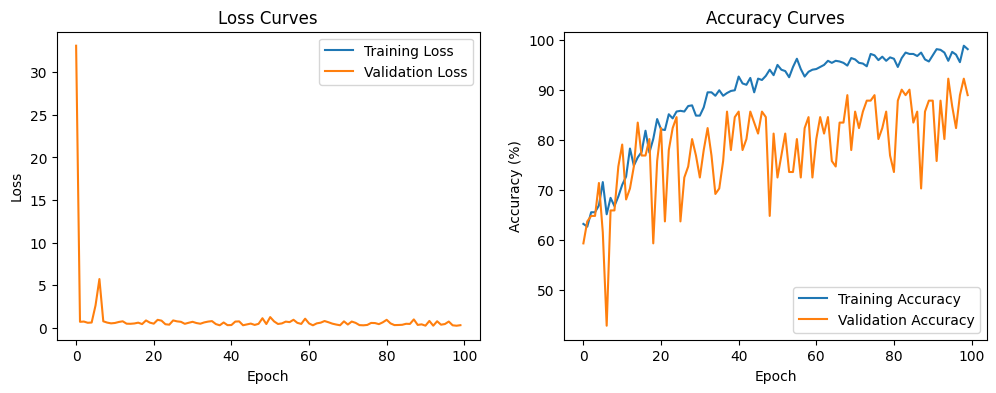

92.3076923076923

In [8]:
import torch
from models import BiTLikeModel
torch.cuda.empty_cache()
train_model(train_loader, val_loader, test_loader, model_class=BiTLikeModel, epochs=100)